### Data augmentation

Loading training, validation and testing sets for data augmentation. I will be only augmenting the training set but the same method could be considered for the validation set as well.

In [4]:
# Load pickled data
import pickle

training_file = '../data/train.p'
validation_file = '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

Utilizing sci-kit image library to create transformed versions of original images. Each transformation pipeline has a random element. I'm using three transformations:

* Rotating an image
* Adding noise to an image
* Changing brightness of an image

In [5]:
# Data augmentation

import random
import skimage as sk
from skimage import transform
from skimage import util
from numpy import ndarray
import numpy as np
import copy
import cv2
import tensorflow as tf

# Pick a random degree of rotation between 15% on the left and 15% on the right
def random_rotation(image_array: ndarray):
    random_degree = random.uniform(-15, 15)
    skoutput = sk.transform.rotate(image_array, random_degree, mode='edge')
    skoutput = skoutput * 255
    return skoutput.astype(int)

# Add random noise to the image
def random_noise(image_array: ndarray):
    skoutput = sk.util.random_noise(image_array)
    skoutput = skoutput * 255
    return skoutput.astype(int)

# Change image brightness by a random amount
def random_brightness(image):
    # Convert 2 HSV colorspace from BGR colorspace
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Generate new random brightness
    rand = random.uniform(0.3, 1.0)
    hsv[:, :, 2] = rand*hsv[:, :, 2]
    # Convert back to BGR colorspace
    new_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return new_img

# Creating placeholders for the augmented data
X_train_aug_rot = np.empty_like(X_train)
X_train_aug_ns = np.empty_like(X_train)
X_train_aug_ga = np.empty_like(X_train)
y_train_aug_rot = np.empty_like(y_train)
y_train_aug_ns = np.empty_like(y_train)
y_train_aug_ga = np.empty_like(y_train)

# Utilizing each augmentation function to generate three augmented versions of each original image
for i, img in enumerate(X_train):
    X_train_aug_rot[i-1] = random_rotation(X_train[i-1])
    X_train_aug_ns[i-1] = random_noise(X_train[i-1])
    X_train_aug_ga[i-1] = random_brightness(X_train[i-1])
    y_train_aug_rot[i-1] = y_train[i-1]
    y_train_aug_ns[i-1] = y_train[i-1]
    y_train_aug_ga[i-1] = y_train[i-1]

# Appending the generated augmented data to the training set
X_train = np.append(X_train, X_train_aug_rot, axis=0)
X_train = np.append(X_train, X_train_aug_ns, axis=0)
X_train = np.append(X_train, X_train_aug_ga, axis=0)
y_train = np.append(y_train, y_train_aug_rot, axis=0)
y_train = np.append(y_train, y_train_aug_ns, axis=0)
y_train = np.append(y_train, y_train_aug_ga, axis=0)

Finally, writing the augmented training data set to a pickle. The training set now includes 4x amount of the original.

In [6]:
# Write data to pickles
train['features'], train['labels'] = X_train, y_train
pickle.dump(train, open('../data/augmented_train.p', 'wb'))

Visualizing tranformations on a sample image.

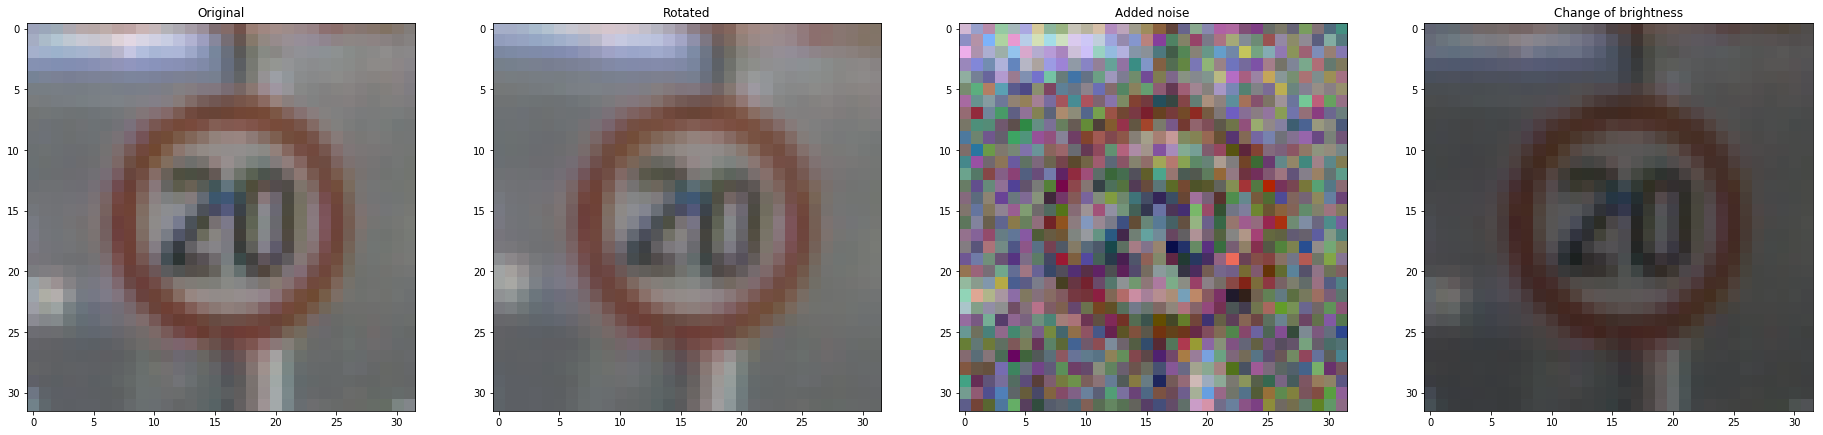

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
# Visualizations will be shown in the notebook.
%matplotlib inline

signnames = pd.read_csv('signnames.csv')

# Showing 64 random images from the training data set
fig = plt.figure(figsize = (32,32))
columns = 4
rows = 1

label = signnames['SignName'][y_train[9999]]
ax = fig.add_subplot(rows, columns, 1)
ax.title.set_text("Original")
plt.imshow(X_train[9999])

label = signnames['SignName'][y_train[9999]]
ax = fig.add_subplot(rows, columns, 2)
ax.title.set_text("Rotated")
plt.imshow(X_train_aug_rot[9999])

label = signnames['SignName'][y_train[9999]]
ax = fig.add_subplot(rows, columns, 3)
ax.title.set_text("Added noise")
plt.imshow(X_train_aug_ns[9999])

label = signnames['SignName'][y_train[9999]]
ax = fig.add_subplot(rows, columns, 4)
ax.title.set_text("Change of brightness")
plt.imshow(X_train_aug_ga[9999])


    
plt.show()
plt.close('all')